### Required Tools:
* vcdb - https://github.com/vz-risk/VCDB
* R - https://www.r-project.org/
* nteract - https://nteract.io
* R jupyter kernel - https://github.com/IRkernel/IRkernel
* verisr - https://github.com/vz-risk/VCDB/tree/master/data/verisr

In [ ]:
### Install packages (only have to run once)
install.packages(tidyverse)

In [1]:
# Load packages
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.1
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [5]:
# load data
load("/path/to/VCDB/data/verisr/vcdb.dat", verbose=TRUE)


Loading objects:
  vcdb


In [11]:
### This is the standard method the DBIR team uses for doing queries
vcdb %>%
    filter(plus.dbir_year %in% 2019) %>% # filter to this year
    filter(attribute.confidentiality.data_disclosure.Yes) %>% # filter to breaches
    dbirR::getenumCI("action") # the percent of breaches with each action

enum,x,n,freq
<fct>,<dbl>,<int>,<dbl>
Error,86,253,0.33992
Hacking,74,253,0.29249
Misuse,62,253,0.24506
Physical,29,253,0.11462
Social,28,253,0.11067
Malware,16,253,0.06324
Environmental,0,253,0.00000
Unknown,2,NA,NA


In [12]:
vcdb %>%
    filter(plus.dbir_year %in% c(2018,2019)) %>% # filter to last two years
    filter(attribute.confidentiality.data_disclosure.Yes) %>% # filter to breaches
    dbirR::getenumCI("action", by="plus.dbir_year") # the percent of breaches with each action by year for last two years

by,enum,x,n,freq
<dbl>,<fct>,<dbl>,<int>,<dbl>
2018,Error,146,491,0.29735
2018,Misuse,126,491,0.25662
2018,Hacking,114,491,0.23218
2018,Physical,80,491,0.16293
2018,Social,44,491,0.08961
2018,Malware,27,491,0.05499
2018,Environmental,0,491,0.00000
2018,Unknown,5,NA,NA
2019,Error,86,253,0.33992


Warning message:
"Removed 1 rows containing missing values (position_stack)."

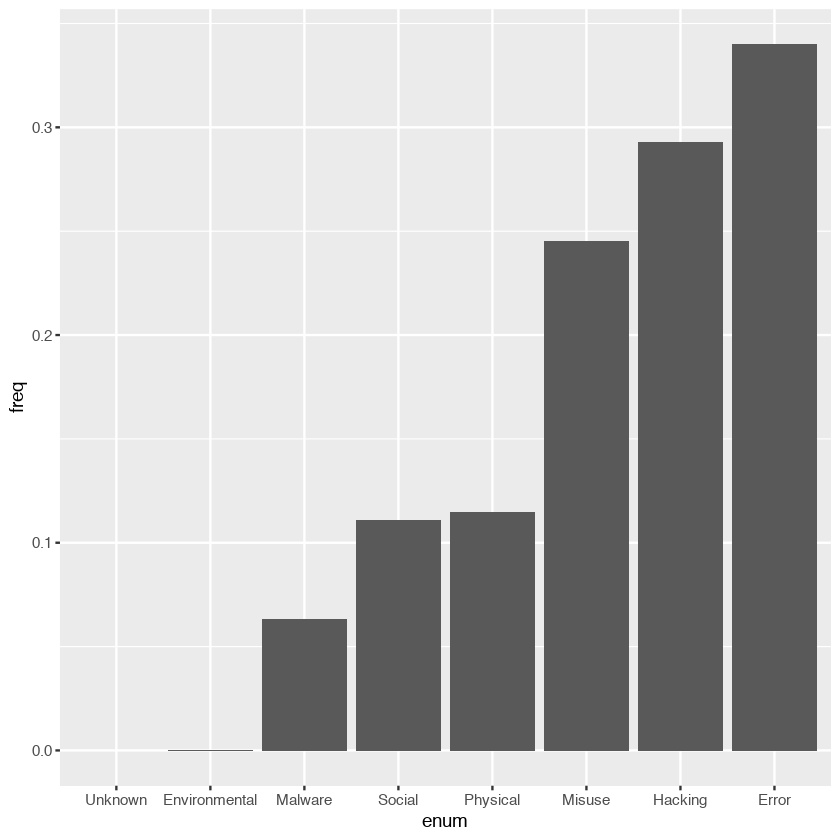

In [14]:
vcdb %>%
    filter(plus.dbir_year %in% 2019) %>% # filter to this year
    filter(attribute.confidentiality.data_disclosure.Yes) %>% # filter to breaches
    dbirR::getenumCI("action") %>% # the percent of breaches with each action
    ggplot() +
    geom_bar(aes(x=enum, y=freq), stat="identity")

### Notes:  
* We are using tidyverse tools.  You can read more about them at http://www.tidyverse.org
* Other interesting queries in place of `action`: `asset`, `actor.*.motive`, `attribute.confidentiality.data.variety`, etc.  You can find a list here: https://github.com/vz-risk/VCDB/blob/master/vcdb-keynames-real.txt.  They will be filled in to varying degrees.
* You may want to look more into ggplot2 for how to make figures https://ggplot2.tidyverse.org/